In [147]:
import torch
import numpy as np
from matplotlib_inline import backend_inline
import matplotlib.pyplot as plt
import math
from torch.distributions import multinomial


def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else plt.gca()
    
    def has_one_axes(X):
        return hasattr(X,"ndim") and X.ndim == 1 or isinstance(X,list) \
               and not hasattr(X[0],"__len__")
    if has_one_axes(X):
        X = [X]
    if Y is None:
        X, Y = [[]]*len(X), X
    elif has_one_axes(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

    
def f(x):
    return x**2 -3 * x + 3.25


def f1(x):
    return x**3 - 1/x


def f2(x):
    b = x * 2
    while b.norm() < 100:
        b = b * 2
    if b.sum() <= 0:
        b = 100 * b
    return b


def sin(x):
    return torch.sin(x)

In [188]:
f??

Signature: f(x)
Docstring: <no docstring>
Source:   
def f(x):
    return x**2 -3 * x + 3.25
File:      /tmp/ipykernel_138330/3715245096.py
Type:      function

In [187]:
f?

Signature: f(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_138330/3715245096.py
Type:      function

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


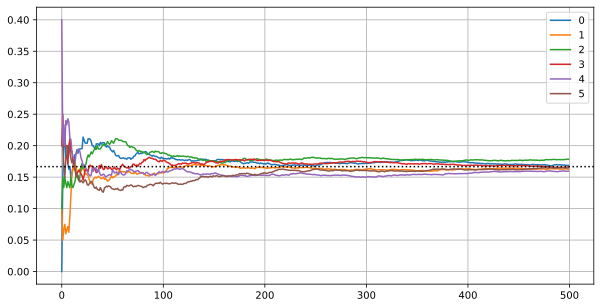

In [178]:
probs = torch.ones(6)/6
# multinomial.Multinomial(1,probs).sample()
s = multinomial.Multinomial(10, probs).sample((500,))
s.shape
s_cum = s.cumsum(axis=0)
s_prob = s_cum/s_cum.sum(axis=1,keepdims=True)
plt.figure(figsize=(10,5))
plt.grid()
for i in range(len(probs)):
    plt.plot(s_prob[:,i].numpy(),label=str(i))
plt.axhline(1/6,c='black',ls=':')
plt.legend()

plt.show()

In [139]:
sin(x).sum().backward()

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


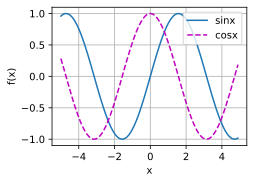

In [141]:
x = torch.arange(-5,5,0.1)
x.requires_grad=True
y = sin(x)
y.sum().backward()
plot(x.detach(),[sin(x).detach(),x.grad],'x','f(x)',legend=['sinx','cosx'])


In [122]:
a = torch.randn(size=(1,2),requires_grad=True)
b = f2(a)
# a.grad.zero_()
b.sum().backward()
a.grad == b/a

tensor([[True, True]])

In [52]:
x = torch.arange(4.0)
x.requires_grad_(True)
x.grad

In [72]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [57]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [73]:
y.backward()
x.grad

tensor([ 0.,  8., 16., 24.])

In [58]:
z = x.sum()
z.backward()
x.grad

tensor([ 1.,  5.,  9., 13.])

In [61]:
x.grad.zero_()
z = x.sum()
z.backward()
x.grad

tensor([1., 1., 1., 1.])

In [75]:
# x.grad.zero_()
m = x*x
m.sum().backward()
x.grad

tensor([ 0., 12., 24., 36.])

In [98]:
m

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [105]:
u

tensor([0., 1., 4., 9.])

In [104]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u * x
z.sum().backward()
x.grad

tensor([0., 1., 4., 9.])

In [83]:
x.grad.zero_()
m = x*x
m.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [107]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [86]:
x.grad.zero_()
m = x * x
m.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

In [88]:
m

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [92]:
m = x * x
m

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [95]:
x.grad.zero_()
m.sum().backward()
m

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [94]:
m.sum().backward()
m

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [81]:
x.grad.zero_()
m = x*x
m.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [65]:
x.grad.zero_()
m.sum().backward()
x.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


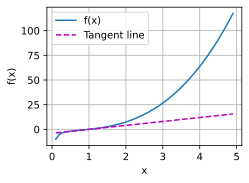

In [49]:
X = np.arange(0.1,5,0.1)
plot(X,[f1(X),4*X-4],'x','f(x)',legend=['f(x)','Tangent line'])

In [9]:
b = np.arange(2, 8)
b

array([2, 3, 4, 5, 6, 7])

In [5]:
a = torch.arange(24).reshape(2, 3, 4)
a.numel(), len(a)

(24, 2)

In [6]:
a

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [11]:
a.sum(axis=0), a.sum(axis=0).shape

(tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 torch.Size([3, 4]))

In [12]:
a.sum(axis=1), a.sum(axis=1).shape

(tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 torch.Size([2, 4]))

In [13]:
a.sum(axis=2), a.sum(axis=2).shape

(tensor([[ 6, 22, 38],
         [54, 70, 86]]),
 torch.Size([2, 3]))

In [17]:
b = torch.arange(1).reshape(-1, 1)
b

tensor([[0]])

In [18]:
a+b

tensor([[0, 1, 2, 3, 4, 5]])

In [4]:
a.numel()

6

In [24]:
a.float().norm()

tensor(65.7571)

In [27]:
torch.linalg.norm(a.float())

tensor(65.7571)

In [28]:
torch.linalg.norm(a.float(),axis=0)

tensor([[12.0000, 13.0384, 14.1421, 15.2971],
        [16.4924, 17.7200, 18.9737, 20.2485],
        [21.5407, 22.8473, 24.1661, 25.4951]])